# Answers to exercises, chapter 4

Before we start, we run some commands to get equation numbering to work in the sheet below and to load some python libraries to do symbolic algebra.

In [31]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

In [32]:
# load sympy to do some symbolic algebra in python
from sympy import *
init_printing()

# Exercise 1

Show that TFT will increase in frequency $p$ as long as its frequency exceeds the threshold value

\begin{align}
\hat{p} = \frac{1-w}{w\left(\frac{b}{c} - 1\right)}
\end{align}

## Answer exercise 1

To assess this we have to show that $W(TFT)>W(ALLD)$, where $p$ is the frequency of TFT and $1-p$ the frequency of ALLD.  

### Fitness TFT
Fitness of a TFT individual, $W(TFT)$, is given by
\begin{align}
W(TFT) &= w_{0} + \mathrm{Pr} \left(TFT\mid TFT \right) V \left(TFT \mid TFT \right )\\&+ \mathrm{Pr} \left(ALLD \mid TFT \right) V \left (TFT \mid ALLD \right )\\
\end{align}.

The individual terms are: 
\begin{align}
\mathrm{Pr} \left(TFT\mid TFT \right) &= p\\
V \left(TFT \mid TFT \right ) &= \frac{b-c}{1-w}\\
\mathrm{Pr} \left(ALLD \mid TFT \right) &= 1-p\\
V \left (TFT \mid ALLD \right ) &= -c
\end{align}

Hence, we have
\begin{align}
W(TFT) &= w_{0} + p \frac{b-c}{1-w} + (1-p) (-c).
\end{align}

### Fitness ALLD
Fitness of an ALLD individual, $W(TFT)$, is given by
\begin{align}
W(ALLD) &= w_{0} + \mathrm{Pr} \left(TFT\mid ALLD \right) V \left(ALLD \mid TFT \right )\\&+ \mathrm{Pr} \left(ALLD \mid ALLD \right) V \left (ALLD \mid ALLD \right ).\\
\end{align}

The individual terms are: 
\begin{align}
\mathrm{Pr} \left(TFT\mid ALLD \right) &= p\\
V \left(ALLD \mid TFT \right ) &= b\\
\mathrm{Pr} \left(ALLD \mid ALLD \right) &= 1-p\\
V \left (ALLD \mid ALLD \right ) &= 0
\end{align}

Hence, we have
\begin{align}
W(TFT) &= w_{0} + pb
\end{align}

### Invasion of TFT possible when TFT has a frequency higher than threshold $\hat{p}$

Right at the threshold frequency $\hat{p}$, fitness of TFT should be identical to that of ALLD (i.e., $w(ALLD) = w(TFT)$, implying that TFT may drift in, but cannot invade. Only when $p > \hat{p}$ will TFT invade due to selection. 

Simplifying $w(ALLD) = w(TFT)$, we have
\begin{align}
w_{0} + p \frac{b-c}{1-w} + (1-p) (-c) &= w_{0} + pb & \\
p \frac{b-c}{1-w} + (1-p) (-c) &= pb & \text{subtract } w_{0}\\
p \frac{b-c}{1-w} -c - p (b - c) &= 0 & \\
p \frac{b-c}{1-w} - p (b - c) &= c & \text{add } c\\
p \frac{b-c}{1-w} - p (b - c) \frac{1-w}{1-w} &= c & \text{bring under common denominator}\\
p \frac{b-c}{1-w} - p \frac{(b - c) - w (b-c)}{1-w} &= c & \\
p \frac{w (b-c)}{1-w} &= c & \\
p &= c \frac{1-w}{w (b-c)} & \text{multiply by inverse} \\
p &= \frac{1-w}{w (b/c-1)} & \text{multiply by }\frac{1/c}{1/c} \\
\end{align}

Replace $p$ by $\hat{p}$ and we are done.

## Effect of increasing $w$ on basin of attraction?

If we increase the probability $w$ that the interaction will continue during the next timestep, what happens? If $w$ increases, the numerator gets smaller, implying that $\hat{p}$ gets closer to $0$ (i.e., it becomes easier for TFT to invade). However, also the denominator gets smaller, making it difficult to precisely assess the effects of $w$. Hence, best to plot things this expression and see what happens when we vary $w$:

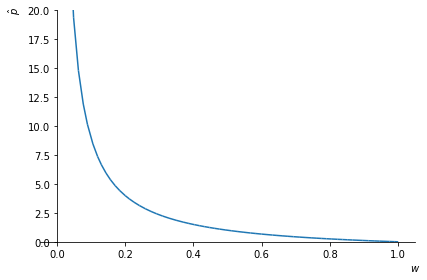

In [33]:
# import plotting package
from sympy.plotting import plot

# declare symbols to build the algebraic expression
w, b, c = symbols("w b c")

# make the expression
pthresh = (1-w)/(w*(b/c - 1))

# first substitute for the parameters b, c and store the result
pthresh_subs = pthresh.subs([(b, 2), (c,1)])

# then plot the substituted expression for different values of w between 0 and 1:
plot(pthresh_subs, (w, 0,1), xlabel="$w$", ylabel="$\hat{p}$",ylim=[0,20])

Hence, we see that when $w \rightarrow 1$, $\hat{p} \rightarrow 0$, meaning that the basin of attraction of TFT increases because TFT can completely take over from ever smaller frequencies $p$. Why does this happen? When $w$ increases, the same individuals are more likely to interact in future, hence this makes life more difficult for ALLD as it is prevented from finding new TFT partners to exploit during the first round.

# Exercise 2

Show that a population in which ALLD is common is vulnerable to invasion by STFT when mutation maintains TF2T in the population at a low frequency

Let $p$ be the frequency of ALLD, $q$ the frequency of STFT and $1-p-q$ the frequency of TF2T. We then have to assess when STFT can invade, or when $W(STFT) > W(ALLD)$. 

However, if TF2T is also around, we first have to assess what happens to that TF2T. If TF2T invades and becomes more common, then likely ALLD cannot remain the most prevalent phenotype, thus affecting the invasion prospects of STFT. Hence, we first need to chekck $W(TFT2) > W(ALLD)$. 


## 2. 1 Fitness expressions
Hence, we need all three fitness expressions $W(ALLD)$, $W(STFT)$ and $W(TF2T)$. Starting with $W(ALLD)$ we have  

\begin{align}
W(ALLD) &= w_{0} + \text{Pr} \left(ALLD\mid ALLD \right) V \left( ALLD \mid ALLD \right) \\
&+ \text{Pr} \left (STFT \mid ALLD \right ) V \left (ALLD \mid STFT \right ) \\
&+ \text{Pr} \left ( TF2T \mid ALLD \right ) V \left ( ALLD \mid TF2T \right)\\
&= w_{0} + p \cdot 0 + q \cdot 0 + (1-p - q)b(1+w).
\end{align}

where $V \left (ALLD \mid STFT \right) = 0$ as STFT defects on the first step and in the next timestep plays again defect as ALLD has defected during the first round and $V \left (ALLD \mid TF2T \right) = b + w b$ as ALLD can exploit TF2T for two rounds, rather than one. 

**Note wrt answers in book:** In the answers on p. 366, McE&B incorrectly list $V \left (ALLD \mid TF2T \right) = 2b$, but this would only hold in case the relationship ends (with probability $1-w$), an ALLD individual would again end up with a TF2T partner, so that $b + w b + (1-w) b = 2b$. However, given that TF2T is rare, this is not likely, so I am afraid this is incorrect.

Continuing with $W(STFT)$, we have

\begin{align}
W(STFT) &= w_{0} + \text{Pr} \left( ALLD \mid STFT \right) V \left ( STFT \mid ALLD \right ) \\
&+ \text{Pr} \left ( STFT \mid STFT \right ) V \left ( STFT \mid STFT \right )\\
&+ \text{Pr} \left ( TF2T \mid ALLD \right ) V \left ( STFT \mid TF2T \right ) \\
&= w_{0} + p \cdot 0 + q \cdot 0 + \left ( 1 - p - q \right )  \left ( b + w \frac{b - c}{1 -w } \right ) \\
&= w_{0} + p \cdot 0 + q \cdot 0 + \left ( 1 - p - q \right )  \left ( b \frac{1-w}{1-w} + w \frac{b - c}{1 -w } \right ) \\
&= w_{0} + p \cdot 0 + q \cdot 0 + \left ( 1 - p - q \right )  \frac{b - wc}{1-w}
\end{align}

where $V \left ( STFT \mid ALLD \right ) = 0$ as STFT defects on first round and then copies opponent's last move which is to defect. 

Similarly,  $V \left ( STFT \mid STFT \right ) = 0$ as STFT defects on first round and then copies opponent's which is again to defect. 

Finally, $V \left ( STFT \mid TF2T \right ) = b + w \frac{b - c}{1 -w }$ as it defects on first round, but TF2T cooperates, so STFT gets payoff $b$. It then enters the next round with probability $w$ where it starts to cooperate with TF2T and gets payoff $b-c$ during each round, resulting in the payoff (see Box 4.1 on p128) $\frac{b-c}{1-w}$ until the relationship ends.

Finally, W(TF2T) is 

\begin{align}
W(TF2T) &= w_{0} + \text{Pr} \left( ALLD \mid TF2T \right ) V \left ( TF2T | ALLD \right) \\
&+ \text{Pr} \left ( STFT \mid TF2T \right ) V \left (  TF2T \mid STFT \right ) \\
&+ \text{Pr} \left ( TF2T \mid TF2T \right ) V \left ( TF2T \mid TF2T \right ) \\
&= w_{0} + p (1 + w)(-c) + q \left [ -c + \frac{w}{1-w} (b - c) \right ] + (1-p - q) \frac{b-c}{1-w}\\
&= w_{0} + p (1 + w)(-c) + q \frac{wb - c}{1-w} + (1-p - q) \frac{b-c}{1-w}
\end{align}

where $V \left ( TF2T | ALLD \right) = (1+w)(-c)$ as TF2T will be exploited by ALLD for two rounds after which the interaction stops.

By contrast, $V \left (  TF2T \mid STFT \right )  = -c + \frac{w}{1-w} (b -c ) $, as STFT will defect on TF2T during the first round resulting in TF2T's payoff of $-c$. In the next round  (reached with probability $w$) cooperation will start, after which the long-term payoff is given by $\frac{b-c}{1-w}$.

Next, $V \left ( TF2T \mid TF2T \right ) = \frac{b-c}{1-w}$ as a pair of TF2T's acts like a pair of TFTs (unless mistakes are occasionally made, see p139 for that).

### Check whether TF2T invades ALLD

Calculating $W(TF2T)>W(ALLD)$ we have

\begin{align}
p (1 + w)(-c) + q \frac{wb - c}{1-w} + (1-p - q) \frac{b-c}{1-w} &> (1-p - q)b(1+w) \\
p (1 + w)(-c) + q \frac{wb - c}{1-w} + (1-p - q) \left [ \frac{b-c}{1-w} - b (1+w) \right ] &> 0 \\
p (1 + w)(-c) + q \frac{wb - c}{1-w} + (1-p - q) \left [ \frac{b-c}{1-w} - b (1+w)\frac{1-w}{1-w} \right ] &> 0 & \text{common denominator} \\
p (1 + w)(-c) + q \frac{wb - c}{1-w} + (1-p - q) \left [ \frac{b-c}{1-w} - b\frac{1-w^2}{1-w} \right ] &> 0 & (1-x)(1+x) = 1-x^{2} \\
p (1 + w)(-c) + q \frac{wb - c}{1-w} + (1-p - q) \frac{w^{2} b-c}{1-w} &> 0 \\
\end{align}

It is easy to see that while the first term is strictly negative, the second term is positive whenever $wb > c$ which is the general condition for the Axelrod-Hamilton dilemma when TFT is common (p129). The third term is positive in a much narrower range of conditions $w^{2} b > c$. Hence, when benefits of cooperation $b \gg c$ are considerable and $w$ is large, invasion of TF2T may be possible when both TF2T and STFT are relatively common. However, if ALLD is very common ($p \approx 1$ as assumed here), it is much more likely that the first term dominates and ALLD is an ESS.

## Check whether STFT invades ALLD 

Calculating $W(STFT)>W(ALLD)$ we have

\begin{align}
\left ( 1 - p - q \right )  \frac{b - wc}{1-w} &>  (1-p - q)b(1+w) \\
\left ( 1 - p - q \right ) \left [ \frac{b - wc}{1-w} - b (1 + w ) \right ]  &> 0\\
\left ( 1 - p - q \right ) \left [ \frac{b - wc}{1-w} - b (1 + w ) \frac{1-w}{1-w} \right ]  &> 0\\
\left ( 1 - p - q \right ) \left [ \frac{b - wc}{1-w} - b \frac{1-w^2}{1-w} \right ]  &> 0 & (1-x)(1+x) = 1-x^{2} \\
\left ( 1 - p - q \right ) \frac{w(bw  - c)}{1-w}   &> 0 \\
bw  - c &> 0 & \text{multiply both sides by} \frac{1-w}{\left ( 1 - p - q \right ) w}\\
\end{align}

Which is the same condition as we have found for the maintenance of TFT when it is common (p129), except that here TF2T is not common at all, but maintained at a small frequency. The reason STFT can invade is that it can cooperate with the rare TF2Ts, whereas STFT can never do so either with ALLD or with itself.